## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [ ]:
# YOUR CODE HERE
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_mnist = pd.read_csv("mnist_dataset.csv")

copy_df = df_mnist

train = 60000
test = 10000

mnist_train = df_mnist.loc[:train]
mnist_test = df_mnist.loc[train:train+test]

In [5]:
#checking for any nan values
mnist_train.isna().sum()
mnist_test.isna().sum()

Unnamed: 0    0
label         0
1x1           0
1x2           0
1x3           0
             ..
28x24         0
28x25         0
28x26         0
28x27         0
28x28         0
Length: 786, dtype: int64

In [7]:
mnist_train.head(5)

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [21]:
# YOUR CODE HERE
import time
from sklearn.ensemble import RandomForestClassifier

X_train = mnist_train.drop(columns=['label'])
y_train = mnist_train['label']

X_test = mnist_test.drop(columns=['label'])
y_test = mnist_test['label']

#timer
start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

end = time.time()

#How long the Random Forest classifier took on the training data
total_time = end - start
total_time

131.8970046043396

In [22]:
#Evaluate the model on the test set
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

#Comparing the results - yields 97% accuracy
accuracy_score(y_test, y_pred)

0.9686

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [27]:
# YOUR CODE HERE
from sklearn.pipeline      import Pipeline
from sklearn.impute        import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

#PCA to reduce datasets dimensionality
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('pca',     PCA(n_components=3)),
])

#New random Forest classifier on the reduced dataset
mnist_pca = pipeline.fit_transform(X_train)

#timer
start_2 = time.time()

clf_2 = RandomForestClassifier()
clf_2.fit(mnist_pca, y_train)

end_2 = time.time()

#Training was faster after the dimensionality reduction
total_time_2 = end_2 - start_2
total_time_2


49.82195019721985

In [19]:
#process used to determine n_components
#Find n_components where explained variance ratio is 95%
pca_mnist = PCA(n_components=2)
pca_result = pca_mnist.fit_transform(X_train)
pca_cum_var = np.cumsum(pca_mnist.explained_variance_ratio_)
print('Cumulative explained variation for principal components: {}'.format(pca_cum_var))

#2 should be enough

Cumulative explained variation for principal components: [0.98869194 0.98979518]


In [26]:
#evaluate the classifier on the test set

test_mnist_pca = pipeline.fit_transform(X_test)

y_pred_2 = clf_2.predict(test_mnist_pca)

#Comparing the results - yields 27% accuracy showing that it sacrifices accuracy for speed and dimension
accuracy_score(y_test, y_pred_2)

0.2663

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [31]:
# YOUR CODE HERE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold     import TSNE

# 1) Set up an imputer (you can choose 'mean', 'median', or e.g. a KNN-imputer)
imputer = SimpleImputer(strategy='median')

# 2) (Optional but recommended) Scale features so t-SNE distances make sense
scaler  = StandardScaler()

# 3) Put it in a pipeline with t-SNE at the end
from sklearn.pipeline import Pipeline
tsne_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',  scaler),
    ('tsne',    TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)),
])

# 4) Fit & transform all at once
tsne_result = tsne_pipeline.fit_transform(X_train)

C:\Users\megda\anaconda3\envs\machine-learning\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60001 samples in 0.200s...
[t-SNE] Computed neighbors for 60001 samples in 126.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60001
[t-SNE] Computed conditional probabilities for sample 2000 / 60001
[t-SNE] Computed conditional probabilities for sample 3000 / 60001
[t-SNE] Computed conditional probabilities for sample 4000 / 60001
[t-SNE] Computed conditional probabilities for sample 5000 / 60001
[t-SNE] Computed conditional probabilities for sample 6000 / 60001
[t-SNE] Computed conditional probabilities for sample 7000 / 60001
[t-SNE] Computed conditional probabilities for sample 8000 / 60001
[t-SNE] Computed conditional probabilities for sample 9000 / 60001
[t-SNE] Computed conditional probabilities for sample 10000 / 60001
[t-SNE] Computed conditional probabilities for sample 11000 / 60001
[t-SNE] Computed conditional probabilities for sample 12000 / 60001
[t-SNE] Computed conditional probabilities for 

C:\Users\megda\AppData\Local\Temp\ipykernel_24028\3284652832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnist_train['tsne-2d-one'] = tsne_result[:, 0]
C:\Users\megda\AppData\Local\Temp\ipykernel_24028\3284652832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnist_train['tsne-2d-two'] = tsne_result[:, 1]


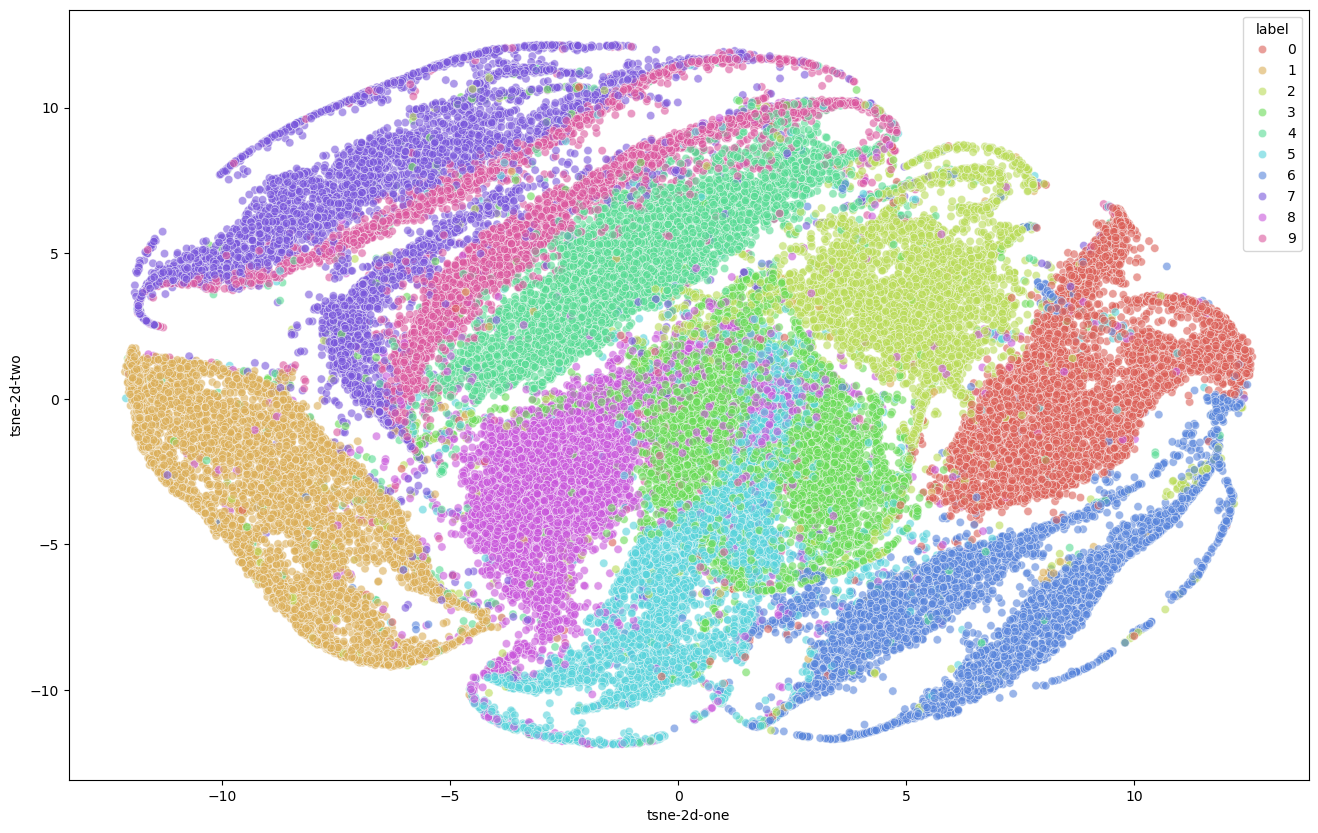

In [33]:
#show result graphically
mnist_train['tsne-2d-one'] = tsne_result[:, 0]
mnist_train['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_train,
               alpha=0.6)
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [ ]:
# YOR CODE HERE
#Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

lle_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',  scaler),
    ('lle',    LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)),
])

# Fit & transform all at once
lle_result = lle_pipeline.fit_transform(X_train)

In [ ]:
#Showing lle results graphically
mnist_train['lle-2d-one'] = lle_result[:, 0]
mnist_train['lle-2d-two'] = lle_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='lle-2d-one', y='lle-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_train,
               alpha=0.6)
plt.show()

In [ ]:
#This is the plot I wanted to use but for some reason the plots aren't loading